In [ ]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

# Data Preprocessing

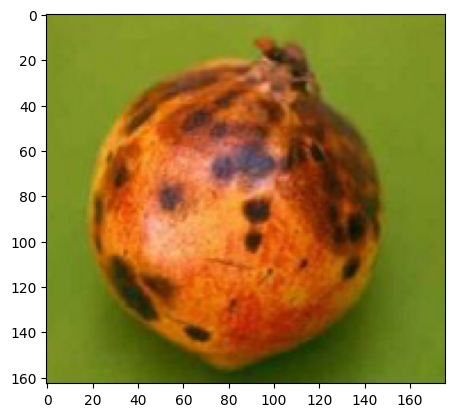

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the new training directory path
Train_DIR = r'D:\Project\PomegranateGuard\images\train'
Categories = ['anthracnose', 'healthy', 'heartrot', 'sample']

# Iterate through each category and display one image
for j in Categories:
    path = os.path.join(Train_DIR, j)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path, img))
        old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(old_image)
        plt.show()
        break
    break


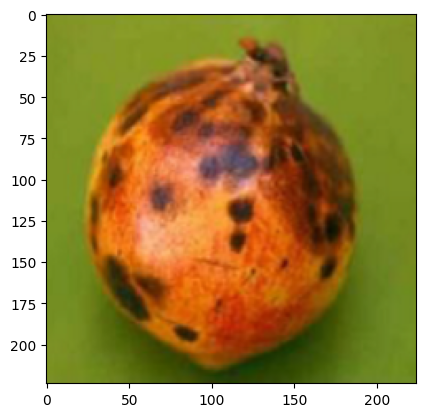

In [3]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
IMG_SIZE = 224

# Create an ImageDataGenerator object with data augmentation and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Define the new training directory path
train_dir = r'D:\Project\PomegranateGuard\images\train'

# Create training data generator
train_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
val_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 354 images belonging to 3 classes.
Found 87 images belonging to 3 classes.


In [6]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,771 (878.01 KB)

 Trainable params: 224,771 (878.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the new checkpoint path
checkpoint_path = 'D:\Project\PomegranateGuard\models\pomegranate2.h5.keras'

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Define EarlyStopping callback
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Combine callbacks into a list
callbacks = [checkpoint, earlystop]


In [9]:
# Now fit the model
model_history = model.fit(
    train_datagen,  # Use the generator
    validation_data=val_datagen,  # Use the validation generator
    epochs=10,
    steps_per_epoch=train_datagen.samples // 16,  # Correctly use the samples attribute of the generator
    validation_steps=val_datagen.samples // 16,  # Correctly use the samples attribute of the generator
    callbacks=callbacks
)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.8154 - loss: 0.5800

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.37836, saving model to D:\Project\PomegranateGuard\models\pomegranate2.h5.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8178 - loss: 0.5765 - val_accuracy: 0.8875 - val_loss: 0.3784
Epoch 2/10
 1/22 ━━━━━━━━━━━━━━━━━━━━ 11s 559ms/step - accuracy: 0.8750 - loss: 0.4249

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.37836
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8750 - loss: 0.4249 - val_accuracy: 0.8750 - val_loss: 0.4080
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8944 - loss: 0.3020
Epoch 3: val_loss improved from 0.37836 to 0.31301, saving model to D:\Project\PomegranateGuard\models\pomegranate2.h5.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 728ms/step - accuracy: 0.8938 - loss: 0.3030 - val_accuracy: 0.9125 - val_loss: 0.3130
Epoch 4/10
 1/22 ━━━━━━━━━━━━━━━━━━━━ 10s 495ms/step - accuracy: 0.8750 - loss: 0.4550
Epoch 4: val_loss did not improve from 0.31301
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8750 - loss: 0.4550 - val_accuracy: 0.8125 - val_loss: 0.4483
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.8598 - loss: 0.3623
Epoch 5: val_loss did not improve from 0.31301
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 736ms/step - accuracy: 0.8612 - loss: 0.3584 - val_accuracy: 0.9000 - val_loss: 0.3306
Epoch

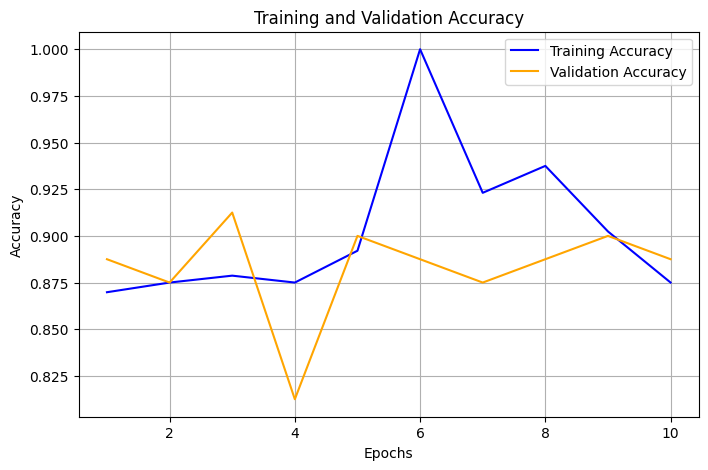

In [11]:
import matplotlib.pyplot as plt

acc_train = model_history.history['accuracy']
acc_val = model_history.history.get('val_accuracy', [])

epochs = range(1, len(acc_train) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_train, 'b', label='Training Accuracy')
if acc_val:
    plt.plot(epochs, acc_val, 'orange', label='Validation Accuracy')

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


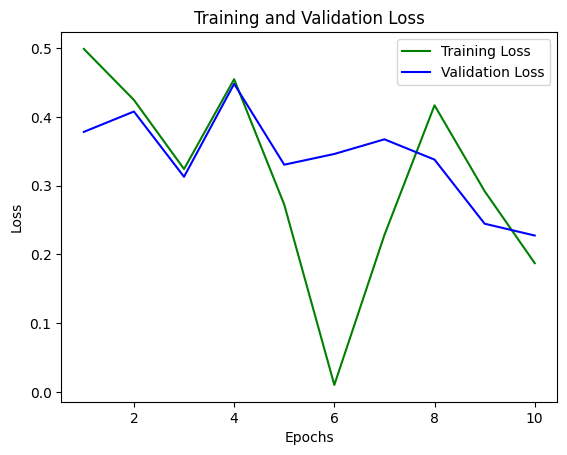

In [13]:
loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Making the Prediction on a Single Image

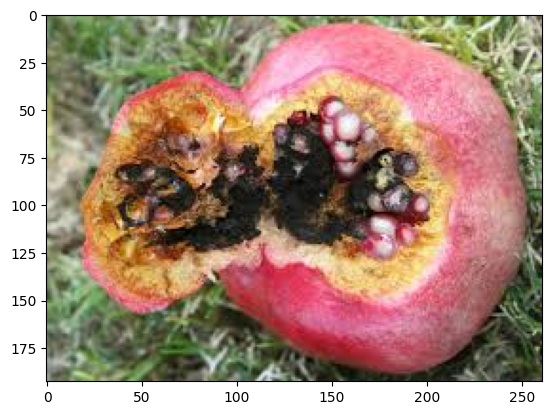

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


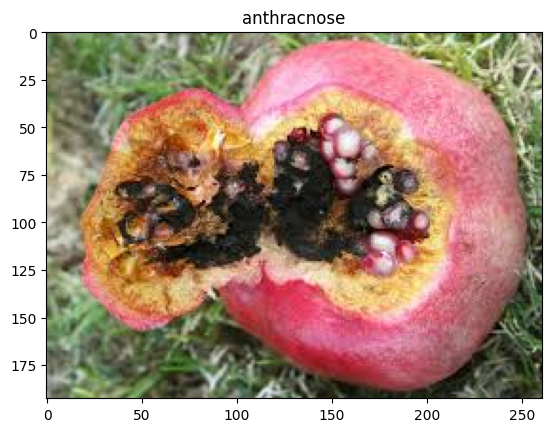

Predicted Class: anthracnose


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# Define the new path for the test image
test_image_path = '/Project/PomegranateGuard/images/test/Test_000.jpg'

# Load and display the test image
image_result = Image.open(test_image_path)
plt.imshow(image_result)
plt.show()

# Preprocess the test image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Predict using the model
result = model.predict(test_image)
predicted_class = np.argmax(result)

# Define categories for interpretation
categories = ['anthracnose', 'healthy', 'heartrot', 'sample']

# Display the prediction result
plt.imshow(image_result)
plt.title(categories[predicted_class])
plt.show()

print("Predicted Class:", categories[predicted_class])
